<h1><center>In Vehicle Coupon Recommendation</center></h1>

# Importing the requisite packages



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn


In [130]:
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [131]:
from sklearn.model_selection import GridSearchCV

### About the Dataset and Project

The following dataset has been taken from UCI Machine Learning library with its collection being attributed to **Tong Wang, tong-wang '@' uiowa.edu, University of Iowa and Cynthia Rudin, cynthia '@' cs.duke.edu, Duke University**. The data has been collected keeping in view how likely is a driver likely to take a coupon given various circumstances such as weather, destination, marital status, occupation, education etc. The response of the person is taken as a yes or no and has been loaded in as '1' or '0' for each individual response. This response will be taken as the prediction element.


**The objective of this project is to predict whether a person will respond with an affirmative to a negative given the various circumstances mentioned. Since, each label is present, it is a perfect set for classification problem by using supervised learning methods. We will be utilizing various models in order to predict the outcome and then selecting the best of them.**

I have decided to take this project since it provides an ideal way to deploy various machine learning objects learnt in class and augment those concepts. Moreover, the dataset also requires some prior work before commencing model preparation which would also be great for learning.

**Citation**
*Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 'A bayesian framework for learning rule sets for interpretable classification.' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393*

### Sequence of Work

The work will be carried out in the following listed sequence:

1. Data Import
2. Data Cleaning
3. Data Exploration
4. Data Visualization
5. Feature Engineering
6. Model Design
7. Model Testing
8. Model Comparison
9. Result and Analysis
10. Conclusion

# Importing the dataset

In [28]:
veh_coupons =pd.read_csv("in-vehicle-coupon-recommendation.csv")

# Data

In [29]:
veh_coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

**1.** The dataset is composed of a total of **26 columns with the 12684 rows**. Each row indicates a single response/observation based upon the factors or features for each individual. 

**2.** The dataset size is **2.02 MB**.

**3.** As listed above, the dataset contains **18 Object type features** and **8 integer type features**.

**Feature Info:**

1. destination: No Urgent Place, Home, Work

2. passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)

3. weather: Sunny, Rainy, Snowy

4. temperature:55, 80, 30

5. time: 2PM, 10AM, 6PM, 7AM, 10PM

6. coupon: Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)

7. expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)

8. gender: Female, Male

9. age: 21, 46, 26, 31, 41, 50plus, 36, below21

10. maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed

11. has_Children:1, 0

12. education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School

13. occupation: Unemployed, Architecture & Engineering, Student,

14. Education&Training&Library, Healthcare Support,

15. Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry

16. income$: 37500 - 49999, 62500 - 74999, 12500 - 24999, 75000 - 87499,
50000 - 62499, 25000 - 37499, 100000 or More, 87500 - 99999, Less than 12500

17. Bar: never, less than 1, 1-3, gt8, 4~8 (feature meaning: how many times do you go to a bar every month?)

18. CoffeeHouse: never, less than 1, 4-8, 1-3, gt8 (feature meaning: how many times do you go to a coffeehouse every month?)

19. CarryAway:n4-8, 1-3, gt8, less than 1, never (feature meaning: how many times do you get take-away food every month?)

20. RestaurantLessThan20: 4-8, 1-3, less than 1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)

21. Restaurant20To50: 1-3, less1, never, gt8, 4-8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)

22. toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)

23. toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)

24. direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)

25. direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)

26. Y:1, 0 (whether the coupon is accepted)

# Data Cleaning

**Checking for NA values:**

Text(0, 0.5, 'No. of Missing Values')

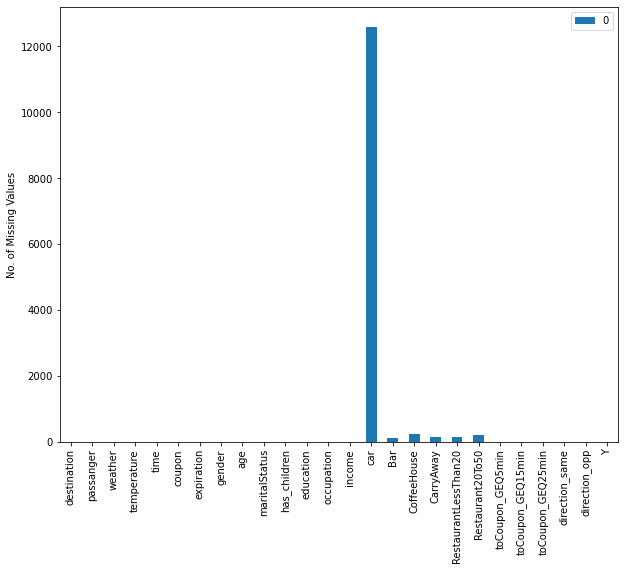

In [32]:
pd.DataFrame(veh_coupons.isna().sum()).plot(kind = 'bar', figsize = (10,8))
plt.ylabel('No. of Missing Values')

**1. We can see that we have multiple columns with missing data. The car columns seems to be mostly missing values so we'll scratch the entire column since it won't be possible to fill the NAs to that level.**

In [33]:
veh_coupons = veh_coupons.drop('car' , axis = 1)

The remaining variables which seem to have Nans, NAs or missing values are 'Bar', 'CoffeeHouse', 'Carryaway', 'RestaurantLessThan20'and 'Restaurant20To50'.

We will be removing rows with NA values since they are much less than 2% of the data points in each column and their removal won't play any tangible effect on the overall model design and accuracy.

**2. Removing Rows with Missing Values**

In [34]:
veh_coupons.dropna(inplace=True)

In [37]:
(veh_coupons).shape

(12079, 25)

In [38]:
12786-12079

707

In [43]:
veh_coupons['CarryAway'].isnull().any()

False

**Data Summary**

We can see that there are now 12079 rows against 25 columns. Moreover, the data does not have any missing values anymore which migh comprosmise our work later.

# Exploratory Data Analysis

In [36]:
veh_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [38]:
veh_coupons.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizing the Data

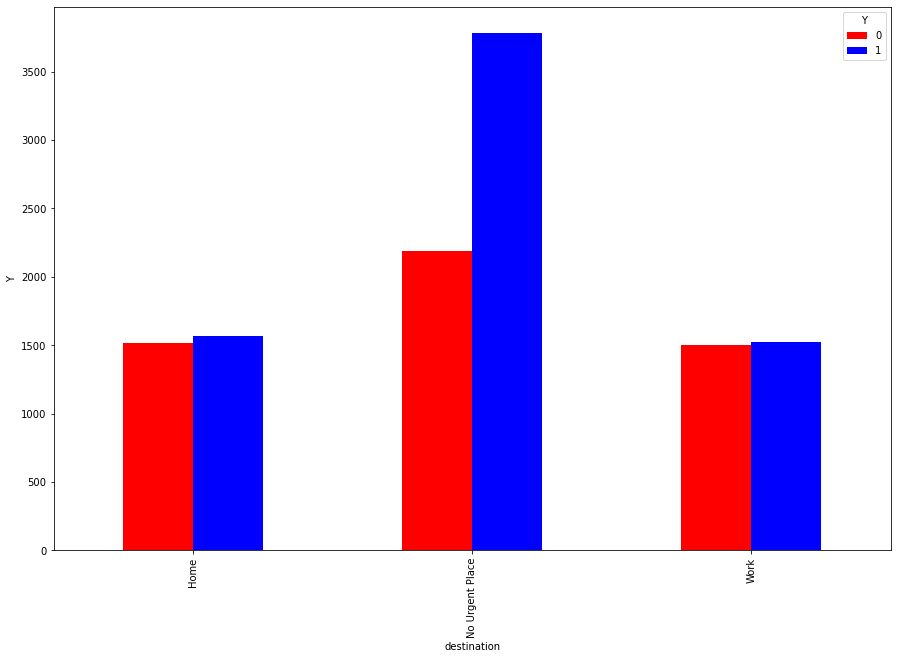

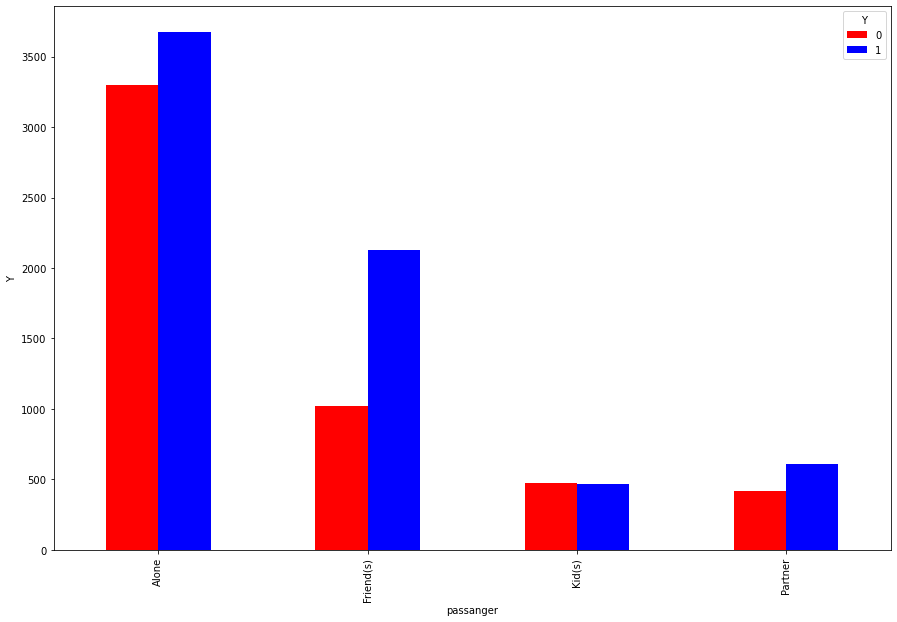

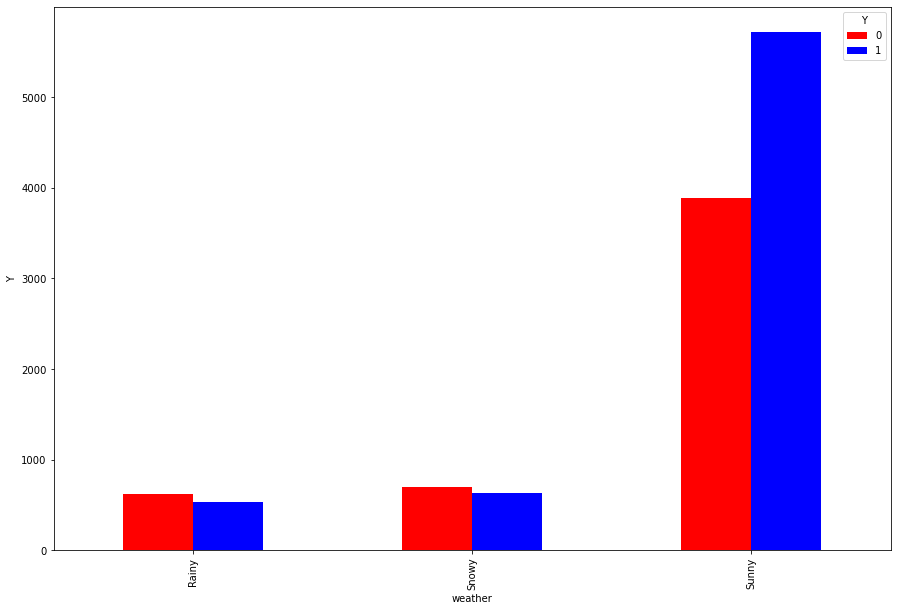

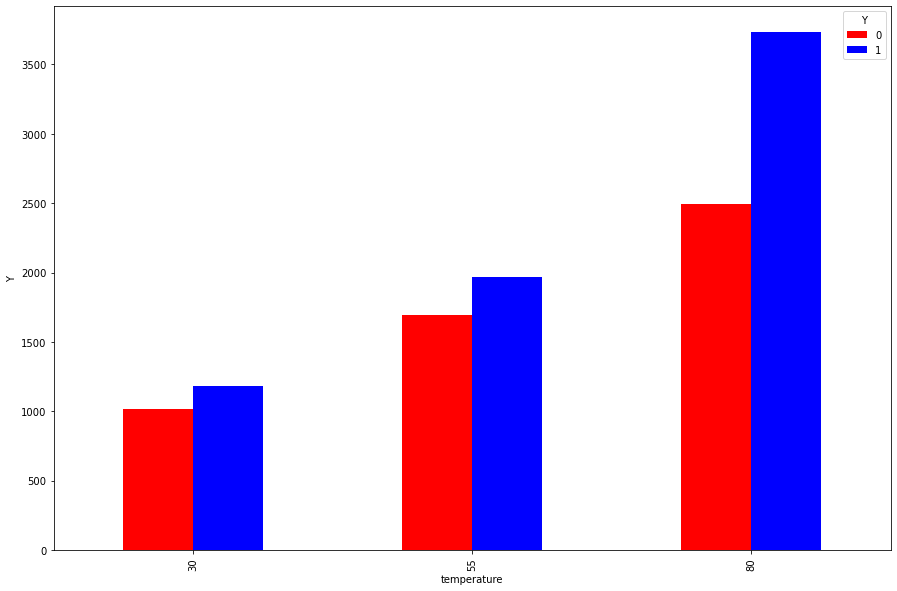

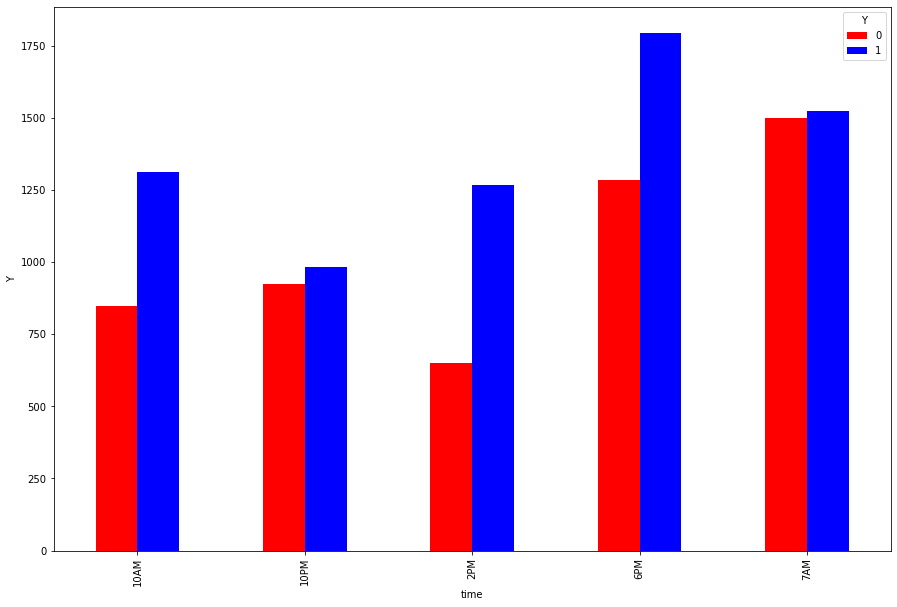

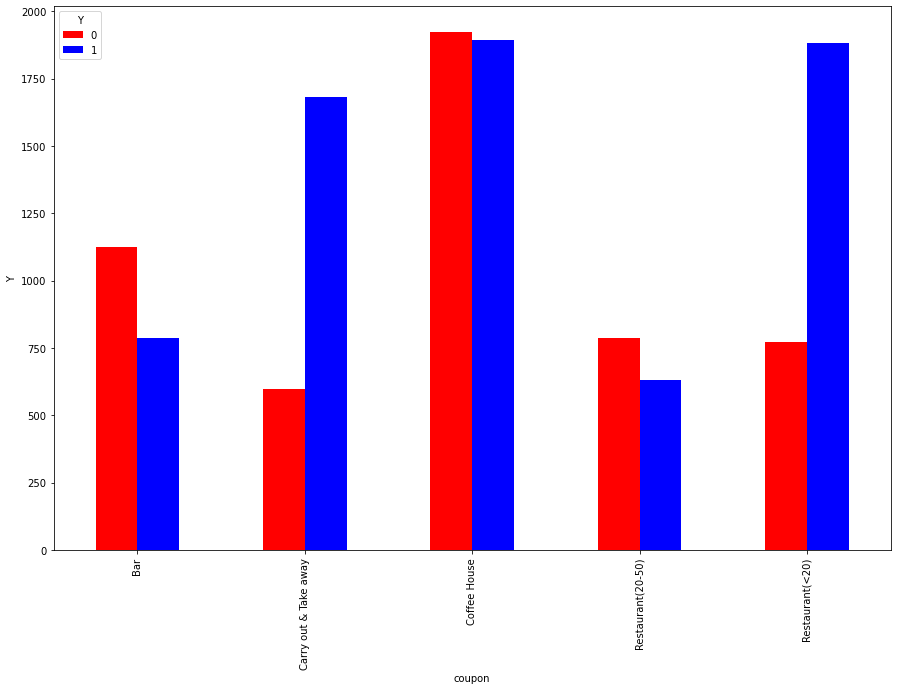

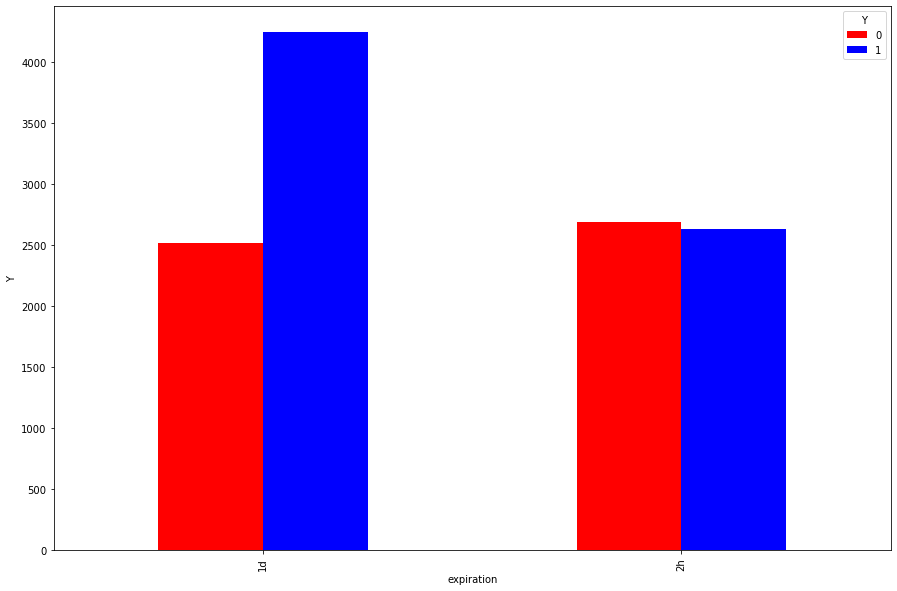

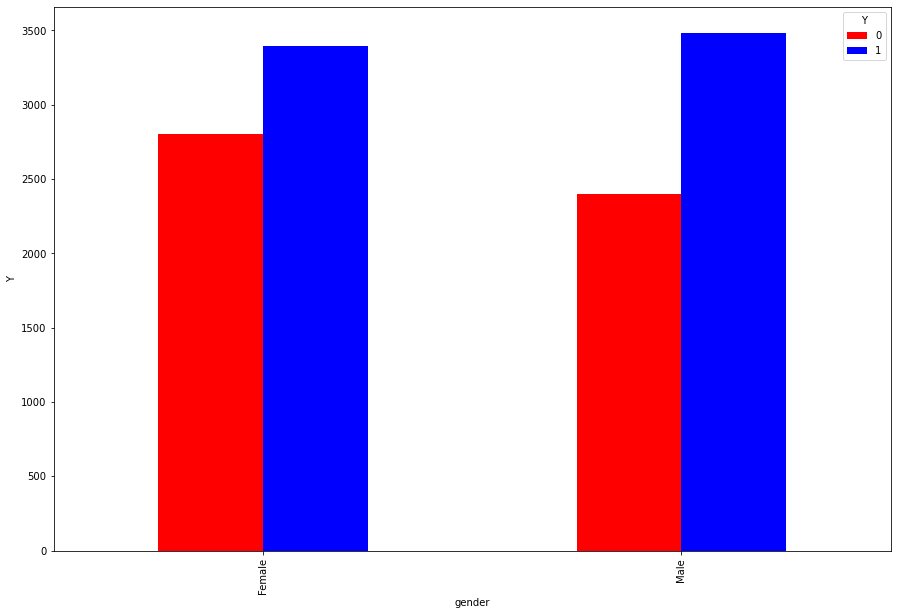

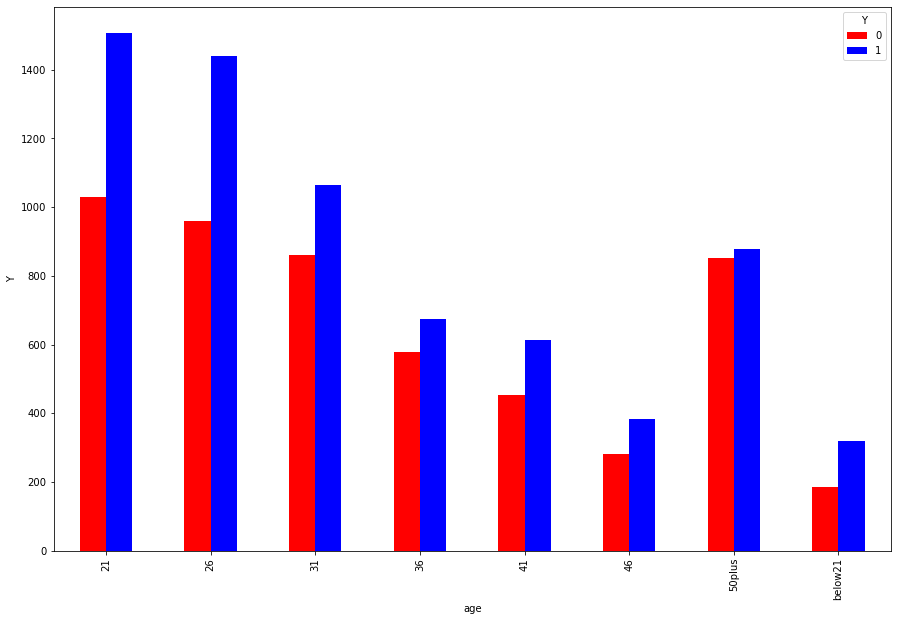

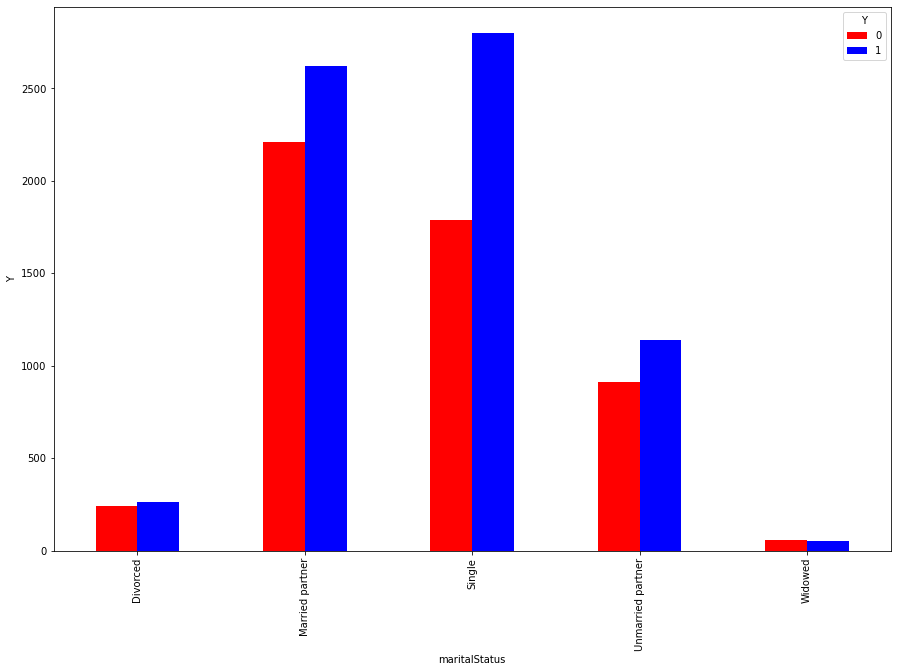

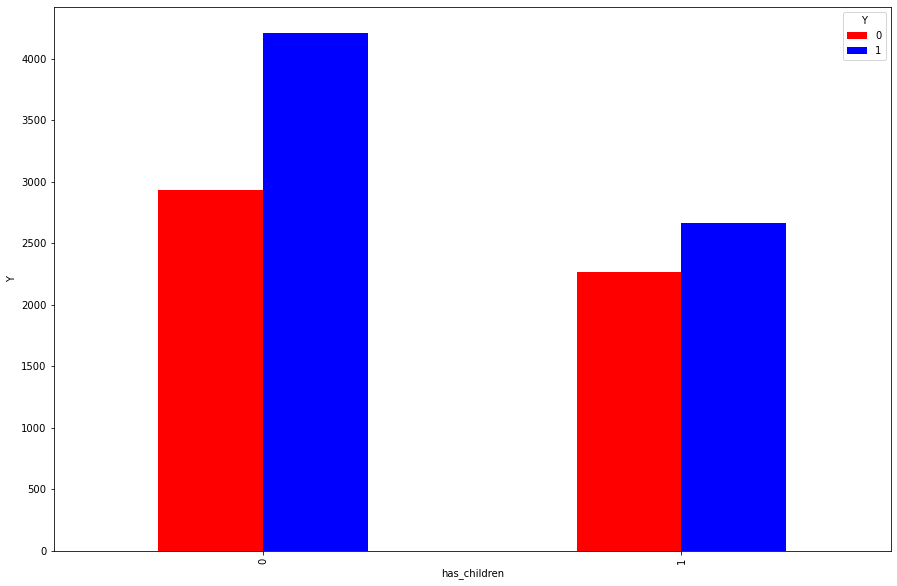

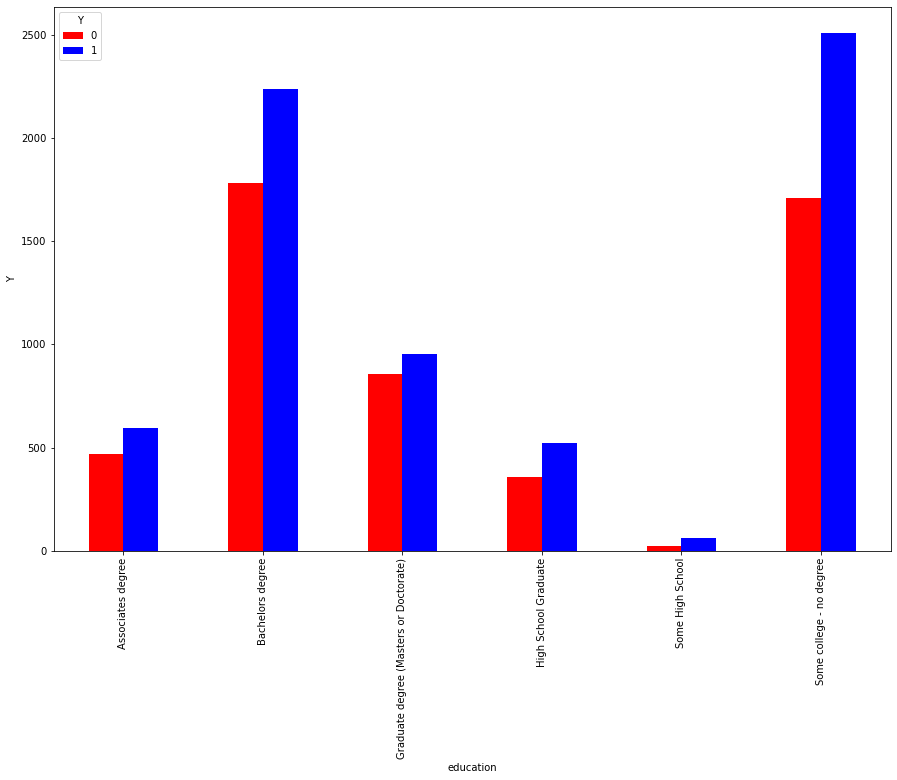

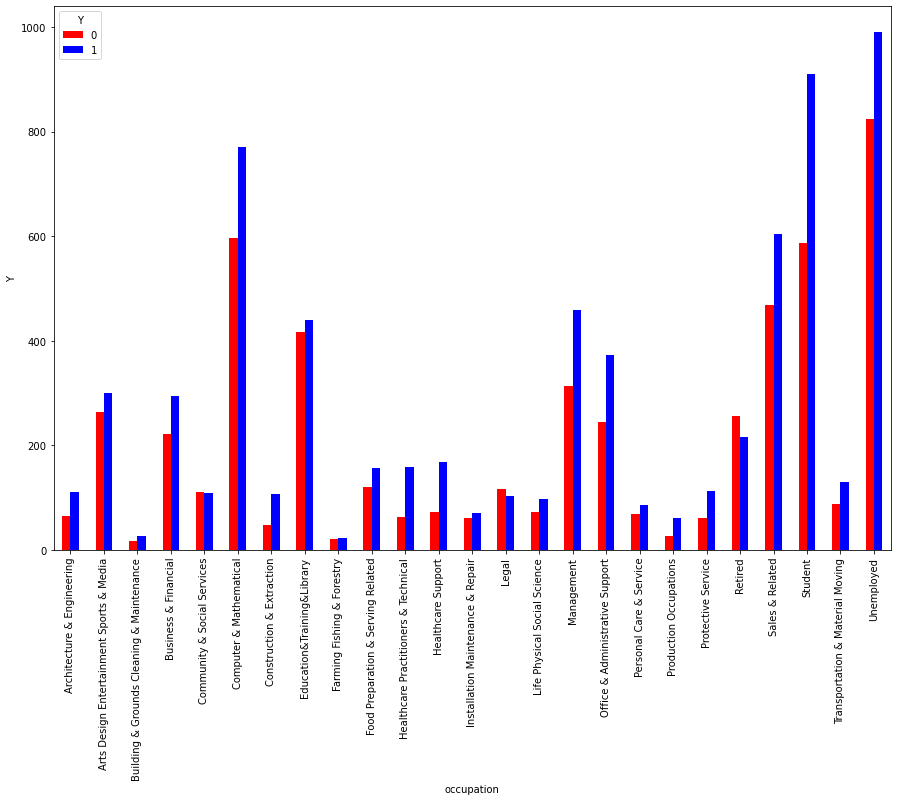

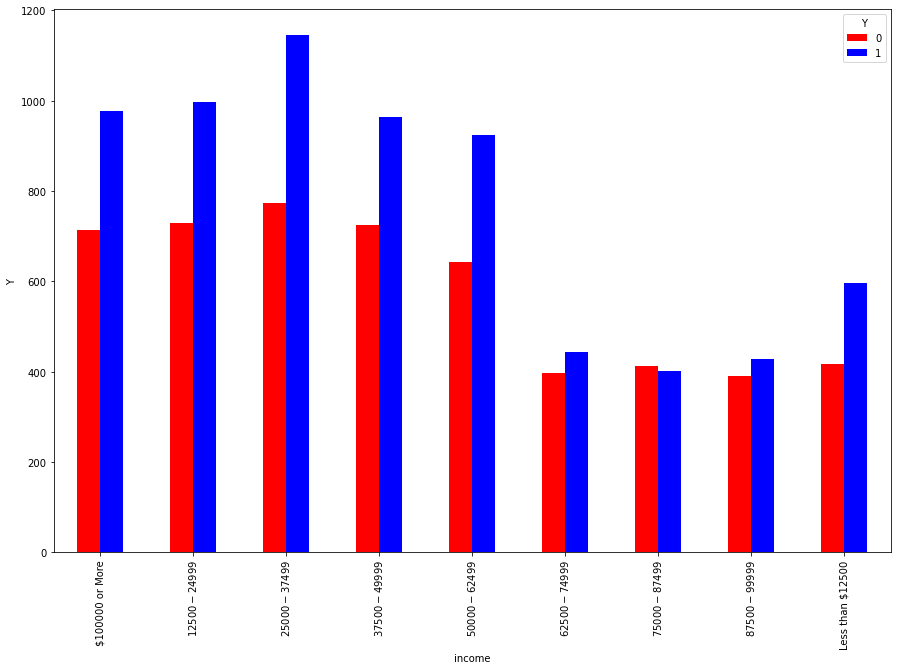

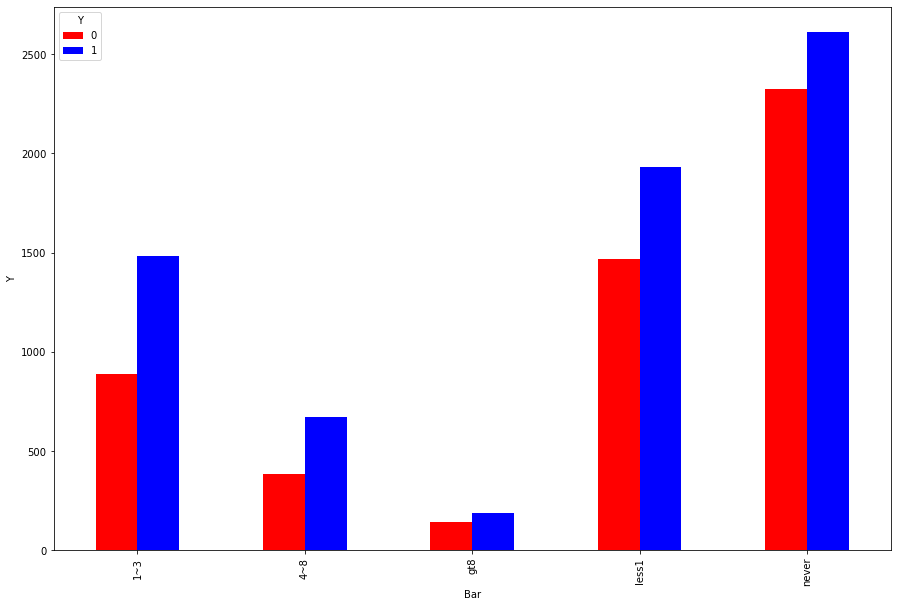

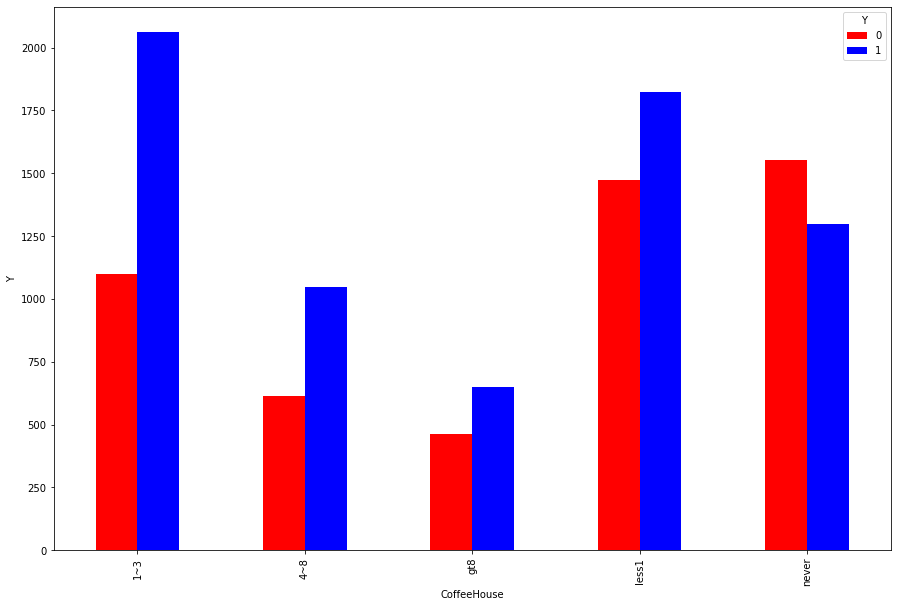

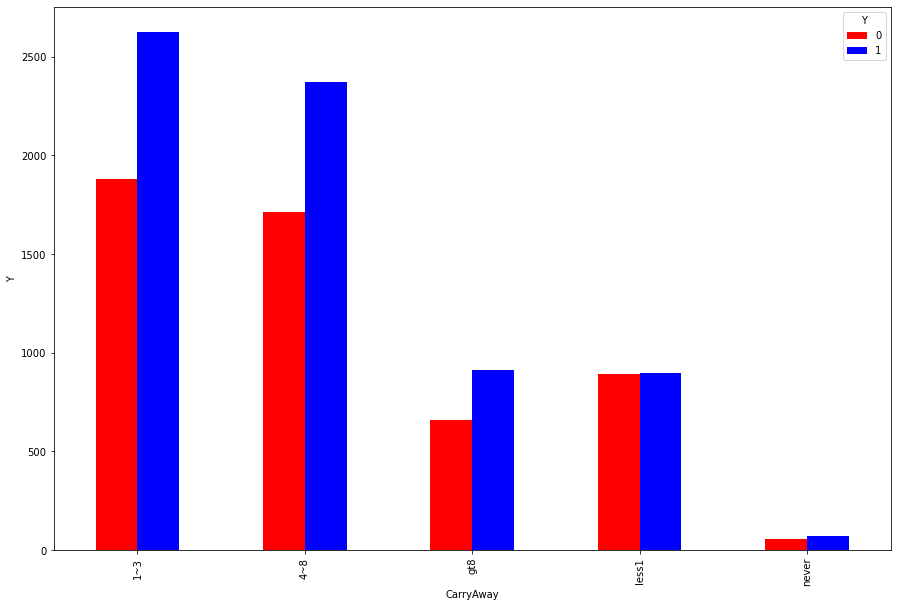

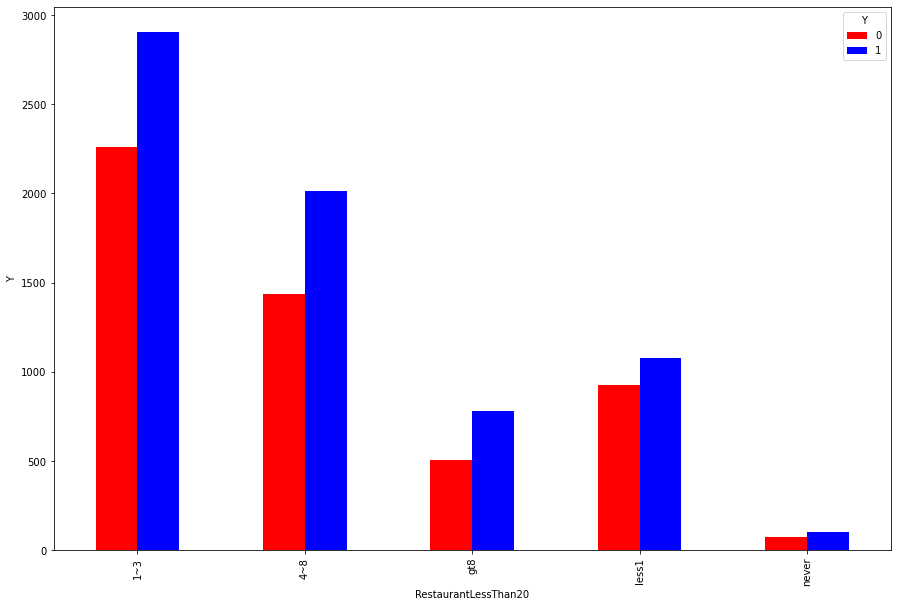

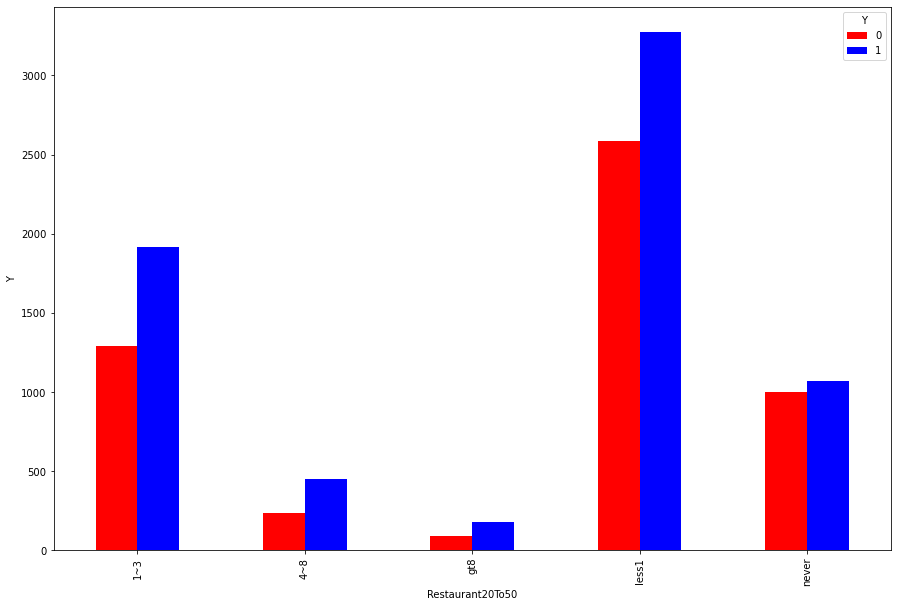

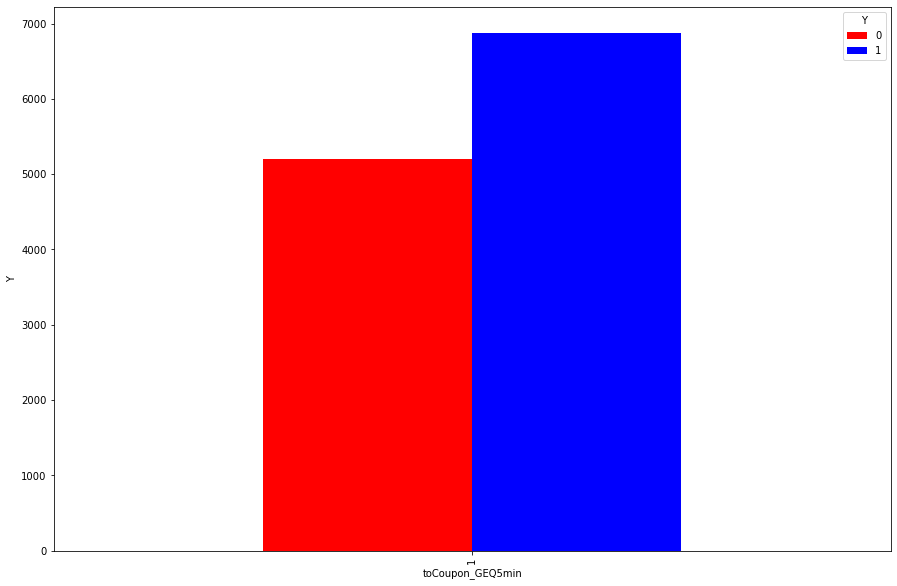

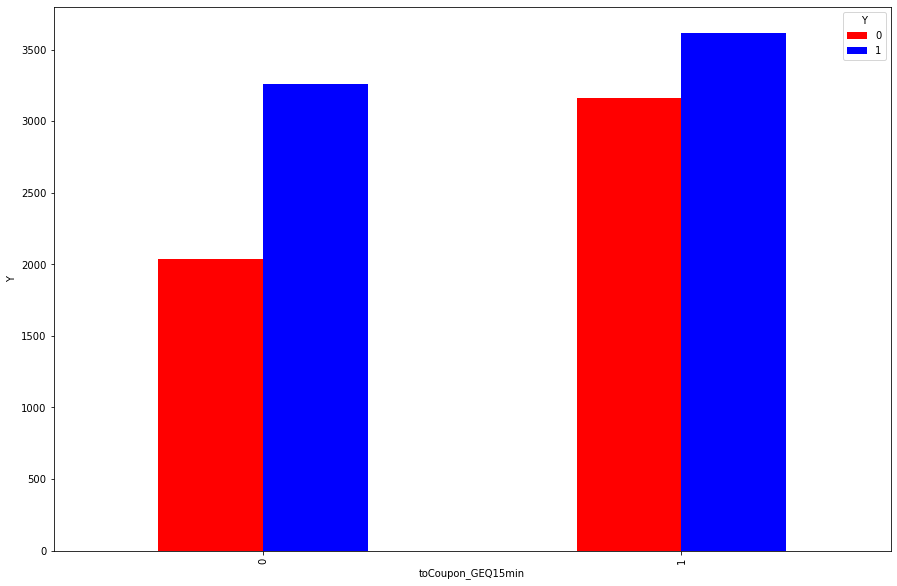

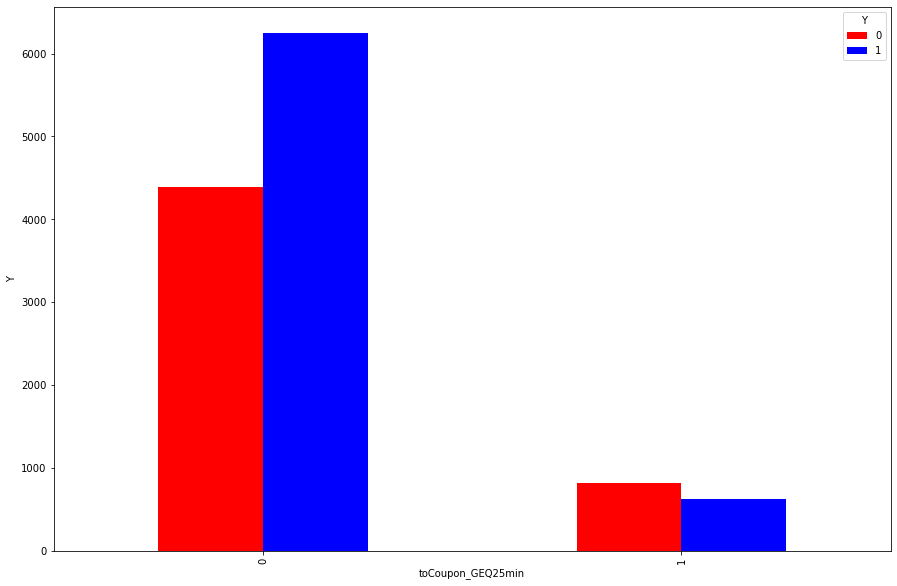

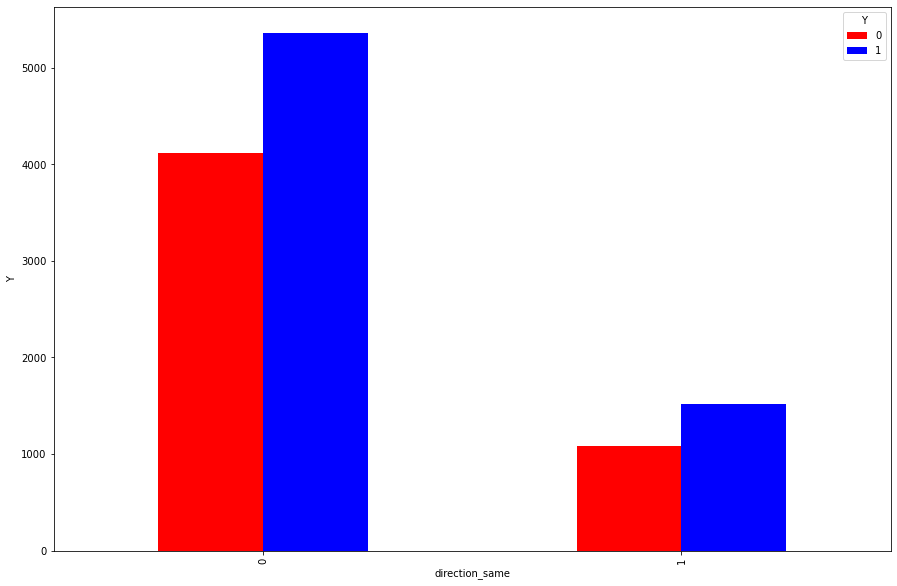

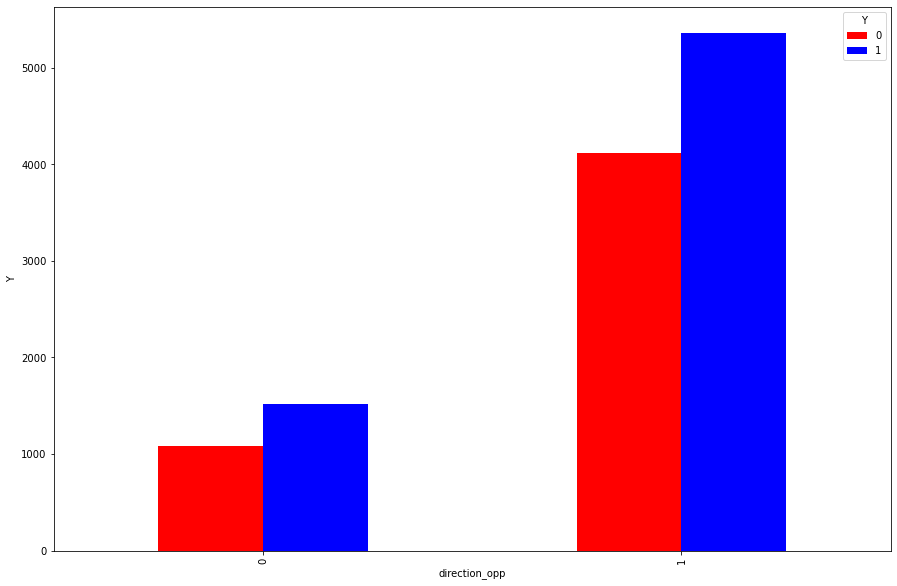

In [30]:
vis = veh_coupons.drop('Y' ,axis =1)
for i in vis.columns:
    veh_coupons.groupby([i, 'Y'])['Y'].count().unstack().fillna(0).plot(kind= 'bar', color = ('red' , 'blue'), figsize=(15,10))
    plt.xlabel(i)
    plt.ylabel('Y')
    plt.show()

**Checking for Collinerity**

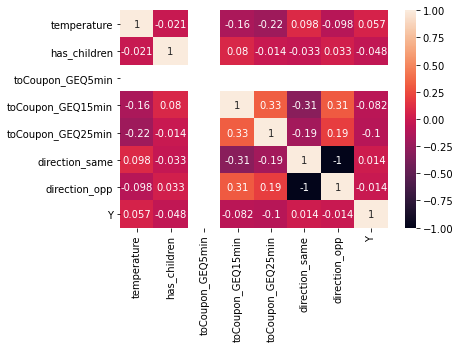

In [40]:
corr_matrix = veh_coupons.corr()
sns.heatmap(corr_matrix ,annot = True)
plt.show()

Here we can see that the features 'direction_same' and 'direction_oppsoite' have perfect opposite correlation. Hence, we will drop these features alongwith 'toCoupon_GEq5min' since it has a constant value throughout the dataset. No other features seem to have substantial correlation to take action so we'll use them.

In [85]:
veh_coupons.drop('toCoupon_GEQ5min',axis = 1, inplace = True)
veh_coupons.drop('direction_same',axis = 1, inplace = True)
veh_coupons.drop('direction_opp',axis = 1, inplace = True)

**Discussion**

From the graphical representation above, we can make some interesting observations:

1.	When a driver is in no hurry, he/she is much more likely to take a coupon as compared to when they are proceeding home/ work or any place else.
2.	There are 2 time brackets when the number of drivers are most likely to accept a coupon and that is 10am and 6pm. 
3.	If the coupon is for a takeaway, then the drivers are most likely to accept it. 
4.	Age seems to be a major factor in as a person gets older starting from 21 years, they are less likely to accept a coupon.
5.	Students have a very high rate of accepting a coupon.

An error had been made earlier when we missed the variable 'toCoupon_GEq5min' in the cleaning step, however, it was identifiedin the correlation matrix and subsequently rectified.

# Model Design 

The following models will be designed on the data:

1. Decision Tree
2. Random Forest
3. AdaBoosting
4. Logistic Regression
5. Support Vector Machines
6. K-Nearest Neighbour
7. Naive Bayes

Each model will be trained on the train data set with 5 fold cross validation. The chosen metric for the model is accuracy which will be graphed against each fold. The mean of the model will be marked in each graph. Afterwards, each model will be tested against the test set.

## Feature Engineering:

After removing the redundant values, we can see that we have many 'object' class values present and it would be prudent change them into digits format for further work.

In [86]:
encoder = sklearn.preprocessing.LabelEncoder()

In [87]:
for i in veh_coupons.columns:
    veh_coupons[i] = encoder.fit_transform(veh_coupons[i])

In [88]:
veh_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
22,1,0,2,1,2,4,0,1,0,2,...,0,5,4,3,1,1,3,0,0,1
23,1,1,2,2,0,2,1,1,0,2,...,0,5,4,3,1,1,3,0,0,0
24,1,1,2,2,0,0,0,1,0,2,...,0,5,4,3,1,1,3,0,0,1
25,1,1,2,2,0,1,1,1,0,2,...,0,5,4,3,1,1,3,1,0,0
26,1,1,2,2,2,2,0,1,0,2,...,0,5,4,3,1,1,3,0,0,0


## Dividing the data into Train and Test

In [116]:
y = veh_coupons['Y']
X = veh_coupons.drop('Y'  , axis = 1)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
X_train.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
5027,1,0,2,2,0,0,0,1,0,2,...,1,5,1,3,0,2,2,0,0,0
5187,2,0,2,2,4,2,1,0,6,2,...,2,7,1,4,4,1,1,3,1,0
11194,1,1,1,0,2,4,0,1,1,2,...,1,22,1,3,2,2,2,3,0,0
11481,1,0,2,2,0,4,1,0,4,1,...,5,1,7,0,0,1,1,0,0,0
11162,0,0,1,0,1,2,1,0,4,1,...,2,5,6,3,1,2,0,3,1,0


### 1. Decision Tree

In [119]:
dt_clf = DecisionTreeClassifier()
k = 5
score_dt = cross_val_score(dt_clf , X_train, y_train, cv = k, scoring = 'accuracy')
dt_model = dt_clf.fit(X_train, y_train)

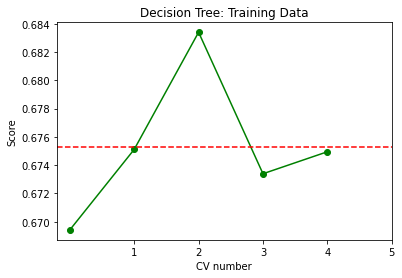

In [120]:
a = [1,2,3,4,5]
plt.plot(score_dt, color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("Decision Tree: Training Data")
plt.xticks(a)
plt.axhline(y=score_dt.mean(), color='r', linestyle='--')
plt.show()

### 2. Random Forest

In [121]:
rf_clf = RandomForestClassifier()
k = 5
score_rf = cross_val_score(dt_clf , X_train, y_train, cv = k, scoring = 'accuracy')
rf_model = rf_clf.fit(X_train, y_train)

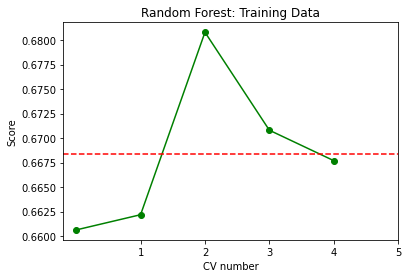

In [122]:
a = [1,2,3,4,5]
plt.plot(score_rf, color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("Random Forest: Training Data")
plt.xticks(a)
plt.axhline(y=score_rf.mean(), color='r', linestyle='--')
plt.show()

### 3. Adaboosting

In [123]:
ab_clf = AdaBoostClassifier()
k = 5
score_ab = cross_val_score(ab_clf , X_train, y_train, cv = k, scoring = 'accuracy')
ab_model = ab_clf.fit(X_train, y_train)

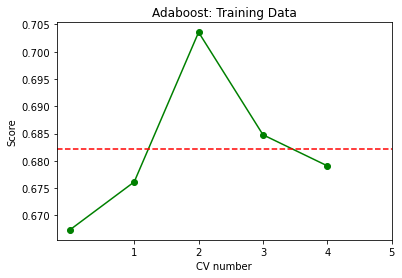

In [124]:
a = [1,2,3,4,5]
plt.plot(score_ab, color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("Adaboost: Training Data")
plt.xticks(a)
plt.axhline(y=score_ab.mean(), color='r', linestyle='--')
plt.show()

### 4. Logistic Regression

In [125]:
lr_clf = LogisticRegression()
k = 5
score_lr = cross_val_score(lr_clf , X_train, y_train, cv = k, scoring = 'accuracy')
lr_model = lr_clf.fit(X_train, y_train)

D:\Anaconda_Launcher\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


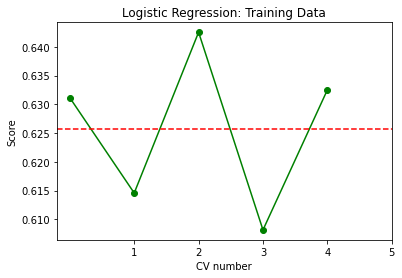

In [126]:
a = [1,2,3,4,5]
plt.plot(score_lr, color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("Logistic Regression: Training Data")
plt.xticks(a)
plt.axhline(y=score_lr.mean(), color='r', linestyle='--')
plt.show()

### 5. Support Vector Machine

In [127]:
svc_clf = SVC()
k = 5
score_svc = cross_val_score(svc_clf , X_train, y_train, cv = k, scoring = 'accuracy')
svc_model = svc_clf.fit(X_train, y_train)

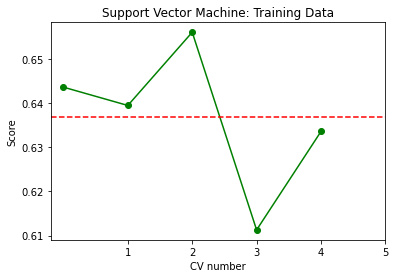

In [128]:
a = [1,2,3,4,5]
plt.plot(score_svc, color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("Support Vector Machine: Training Data")
plt.xticks(a)
plt.axhline(y=score_svc.mean(), color='r', linestyle='--')
plt.show()

### 6. K-Nearest Neighbour

In [102]:
knn_clf = KNeighborsClassifier()
k = 5
score_knn = cross_val_score(knn_clf , X_train, y_train, cv = k, scoring = 'accuracy')
knn_model = knn_clf.fit(X_train, y_train)

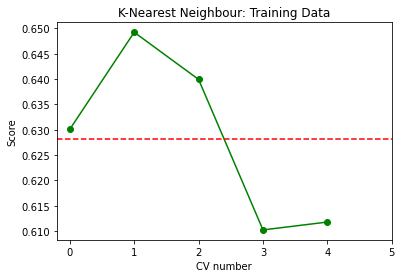

In [103]:
a = [0,1,2,3,4,5]
plt.plot(score_knn, color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("K-Nearest Neighbour: Training Data")
plt.xticks(a)
plt.axhline(y=score_knn.mean(), color='r', linestyle='--')
plt.show()

### 7. Naive Bayes

In [104]:
gnb_clf = GaussianNB()
k = 5
score_nb = cross_val_score(gnb_clf , X_train, y_train, cv = k, scoring = 'accuracy')
gnb_model = gnb_clf.fit(X_train, y_train)

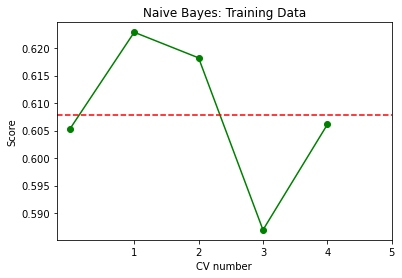

In [105]:
a = [1,2,3,4,5]
plt.plot(score_nb, color='green', marker='o')
plt.xlabel("CV number")
plt.ylabel("Score")
plt.title("Naive Bayes: Training Data")
plt.xticks(a)
plt.axhline(y=score_nb.mean(), color='r', linestyle='--')
plt.show()

## Testting Models on Test Data

### 1. Decision Tree

In [106]:
pre_dt = dt_model.predict(X_test)
score_dtt = accuracy_score(pre_dt , y_test)
score_dtt

0.6804635761589404

### 2. Random forest

In [107]:
pre_rf = rf_model.predict(X_test)
score_rft = accuracy_score(pre_rf , y_test)
score_rft

0.7533112582781457

### 3. Adaboost

In [108]:
pre_ab = ab_model.predict(X_test)
score_abt = accuracy_score(pre_ab , y_test)
score_abt

0.6779801324503312

### 4. Logistic Regression

In [109]:
pre_lr = lr_model.predict(X_test)
score_lrt = accuracy_score(pre_lr , y_test)
score_lrt

0.6336920529801324

### 5. Support Vector Machine

In [110]:
pre_svc = svc_model.predict(X_test)
score_svct = accuracy_score(pre_svc , y_test)
score_svct

0.6440397350993378

### 6. K-Nearest Neighbour

In [111]:
pre_knn = knn_model.predict(X_test)
score_knnt = accuracy_score(pre_knn , y_test)
score_knnt

0.6519039735099338

### 7. Naive Bayes

In [112]:
pre_nb = gnb_model.predict(X_test)
score_nbt = accuracy_score(pre_nb , y_test)
score_nbt

0.6100993377483444

## Results and Analysis

In [113]:
data = [['Decision Tree' , score_dt.mean() , score_dtt], ['Random Forest' , score_rf.mean() , score_rft],
                        ['Adaboost' , score_ab.mean(), score_abt], ['Logistic Regression' , score_lr.mean(), score_lrt],
                        ['SVM' , score_svc.mean(), score_svct] , ['KNN', score_knn.mean(), score_knnt],
                                                  ['Naive Bayes' , score_nb.mean(), score_nbt]]

result = pd.DataFrame(data, columns = ['Model' , 'Training Accuracy' , 'Test Accuracy'])
result

,Model,Training Accuracy,Test Accuracy
0,Decision Tree,0.672978,0.680464
1,Random Forest,0.673393,0.753311
2,Adaboost,0.678775,0.677980
3,Logistic Regression,0.627134,0.633692
4,SVM,0.635516,0.644040
5,KNN,0.628269,0.651904
6,Naive Bayes,0.607883,0.610099


<AxesSubplot:xlabel='Model'>

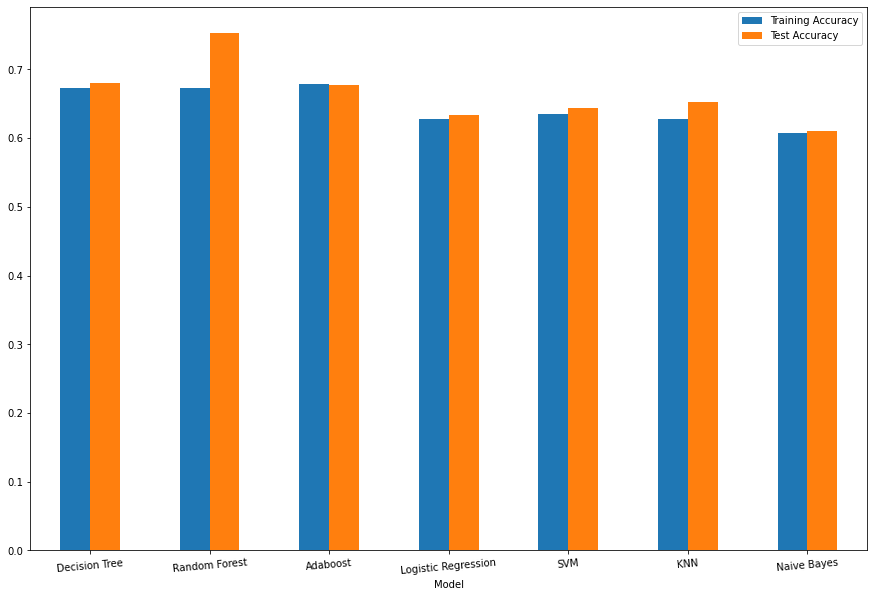

In [114]:
result.plot(x="Model", y=["Training Accuracy", 'Test Accuracy'], kind="bar", rot=5, fontsize=10, figsize=(15,10))

We can observe from the visual comparisons of the accuracy of various models in terms of training and test data. It can be concluded that the **Random Forest Model is the best choice** for predicting whether a person would accept a coupon or not. We can also see that the predicitive capability of the Random Forest on the test data is way better then the training set. Though other models also display this ability but the difference of the results in much more in the Random Forest Model.

**Random Forest Accuracy on Training Data : 67%**

**Random Forest Accuracy on Test Data : 75%**

### Selected Model Optimization(Random Forest)

In [137]:
features= [ 'auto', 'sqrt', 'log2', None]
estimators = [100,150,200,250,300,350,400,450,500]
acc_score = []
for i in features:
    for j in estimators:
        model = RandomForestClassifier(n_estimators = j , max_features = i ).fit( X_train, y_train)
        
        pred = model.predict(X_test)
        
        acc = accuracy_score(y_test,pred)
        temp =(i , j , acc)
        
        acc_score.append(temp)
        

In [138]:
acc_score

[('auto', 100, 0.75),
 ('auto', 150, 0.7562086092715232),
 ('auto', 200, 0.7528973509933775),
 ('auto', 250, 0.7545529801324503),
 ('auto', 300, 0.7541390728476821),
 ('auto', 350, 0.7591059602649006),
 ('auto', 400, 0.7541390728476821),
 ('auto', 450, 0.7586920529801324),
 ('auto', 500, 0.7557947019867549),
 ('sqrt', 100, 0.75),
 ('sqrt', 150, 0.7491721854304636),
 ('sqrt', 200, 0.7545529801324503),
 ('sqrt', 250, 0.7516556291390728),
 ('sqrt', 300, 0.7520695364238411),
 ('sqrt', 350, 0.7557947019867549),
 ('sqrt', 400, 0.7549668874172185),
 ('sqrt', 450, 0.7545529801324503),
 ('sqrt', 500, 0.7595198675496688),
 ('log2', 100, 0.7491721854304636),
 ('log2', 150, 0.7508278145695364),
 ('log2', 200, 0.7562086092715232),
 ('log2', 250, 0.7549668874172185),
 ('log2', 300, 0.7508278145695364),
 ('log2', 350, 0.7508278145695364),
 ('log2', 400, 0.7545529801324503),
 ('log2', 450, 0.7566225165562914),
 ('log2', 500, 0.7545529801324503),
 (None, 100, 0.7512417218543046),
 (None, 150, 0.7574503

Even after adjusting the various hyperparameters, we could only improve the acuracy by 0.9% when the estimators were set at 500 and max_features to sqrt. It is, however, exprected since the sqrt feature method tends to do better against classification problems.

# Conclusion

In this project, multiple models were used to train the data. The most vital takeaway is to spend as much time as possible on the data cleaning to get good results. During the course of the project, a redundant feature was left in the cleaning process which was later identified in the correlation matrix and dealt with. During the model design phase, the accuracy of the random forest was almost equivalent to the others but when the model was tested against the test set, it stood out by quite some margin. Some more ways that may be used to bring the other models at par may include the optimization of the hyperparameters for likely better results. In my view, Adaboost should have worked much better then the Random Forest model but it did not. However, the same issue might be addessable by adjusting the hyperparameters.